<a href="https://colab.research.google.com/github/Sella41236793/T3_DL_41236793_SELA/blob/main/T3_DL_41236793_SELA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gambar berhasil dimuat.
Sedang memuat model (mungkin butuh beberapa saat)...
Sedang memproses gambar...


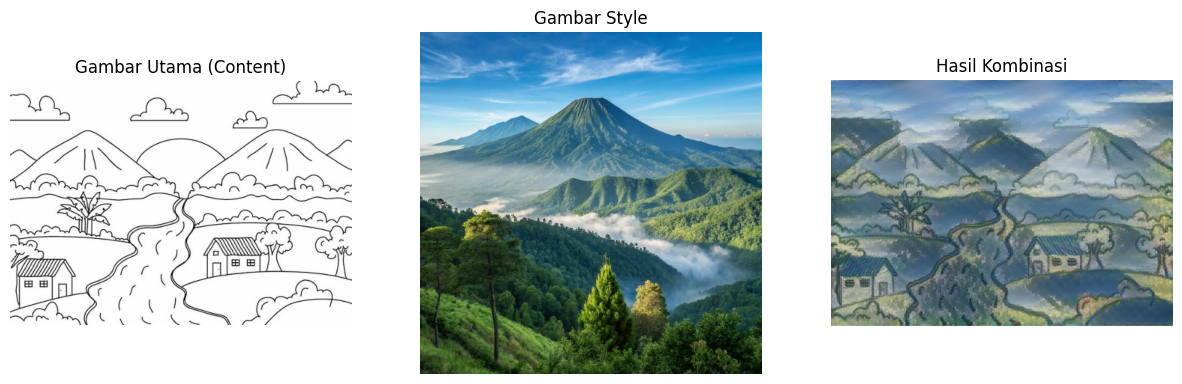

Gambar hasil tersimpan sebagai 'hasil_kombinasi.jpg'


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import cv2

# --- 1. Fungsi Utilitas untuk Memuat & Mengolah Gambar ---
def tensor_to_image(tensor):
  '''Mengubah tensor menjadi gambar yang bisa ditampilkan'''
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

def load_img(path_to_img):
  '''Memuat gambar dan mengubah ukurannya agar pas dengan model'''
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def show_images(content, style, result):
  '''Menampilkan 3 gambar berdampingan'''
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.title("Gambar Utama (Content)")
  plt.imshow(tensor_to_image(content))
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.title("Gambar Style")
  plt.imshow(tensor_to_image(style))
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.title("Hasil Kombinasi")
  plt.imshow(tensor_to_image(result))
  plt.axis('off')
  plt.show()

# --- 2. Memuat Gambar ---
# Pastikan nama file sesuai dengan yang kamu upload
content_path = '/content/drive/MyDrive/deep learning lanjut/img/gambar_utama.jpg'
style_path = '/content/drive/MyDrive/deep learning lanjut/img/gambar_style.jpg'

try:
    content_image = load_img(content_path)
    style_image = load_img(style_path)
    print("Gambar berhasil dimuat.")
except Exception as e:
    print(f"Error: Pastikan file '{content_path}' dan '{style_path}' sudah diupload. Detail: {e}")

# --- 3. Memuat Model Neural Style Transfer ---
# Kita menggunakan model pre-trained dari TensorFlow Hub (Magenta)
print("Sedang memuat model (mungkin butuh beberapa saat)...")
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# --- 4. Menjalankan Style Transfer ---
# Baris ini adalah inti proses penggabungan
print("Sedang memproses gambar...")
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# --- 5. Menampilkan & Menyimpan Hasil ---
show_images(content_image, style_image, stylized_image)

# Simpan hasil ke file
result_image = tensor_to_image(stylized_image)
result_image.save("hasil_kombinasi.jpg")
print("Gambar hasil tersimpan sebagai 'hasil_kombinasi.jpg'")